# Lesson 17: Linear Regression with Scipy

We attempted to make accurate trendlines ourselves, now we'll let the computer create the best possible linear regression.  

import all the necessities, plus the new **Scipy Stats**

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

Lets load up the City Temperature data

In [12]:
data = pd.read_csv('../src/CityTempLatLong.csv')
temps = data['Temperature']
lats = data['Latitude']

Now we can use **Scipy** to calculate a linear regression model for us. We will use the `linregress()` **constructor** to create a `LinregressResult` **Object**

In [13]:
lin_reg = stats.linregress(lats, temps)

The `LinregressResult` Object has 6 attributes: `slope`, `intercept`, `rvalue`, `pvalue`, `stderr`, and `intercept_stderr`

We can use the `slope` and `intercept` values to plot the trendline

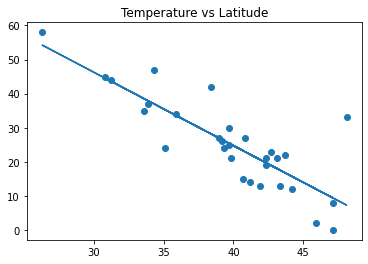

-2.153870732386617 110.8799497993169


In [14]:
plt.scatter(lats, temps)
plt.title('Temperature vs Latitude')
slope = lin_reg.slope
intercept = lin_reg.intercept
plt.plot(lats, slope * lats + intercept)
plt.show()
print(slope, intercept)

That looks pretty good. Lets put our trendlines in too

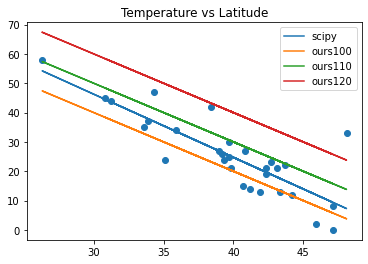

In [19]:
plt.scatter(lats, temps)
plt.title('Temperature vs Latitude')
slope = lin_reg.slope
intercept = lin_reg.intercept
plt.plot(lats, slope * lats + intercept, label="scipy")
plt.plot(lats, -2 * lats + 100, label="ours100")
plt.plot(lats, -2 * lats + 110, label="ours110")
plt.plot(lats, -2 * lats + 120, label="ours120")
plt.legend()
plt.show()

Now lets use our `standard_error` to determine if Scipy did better than us.

In [42]:
def standard_error(data_y, predicted_y):
    dist = np.sqrt(np.sum((data_y-predicted_y)**2))
    return dist / np.size(data_y)

print(standard_error(temps, slope * lats + intercept))
print(standard_error(temps, -2 * lats + 100))
print(standard_error(temps, -2 * lats + 110))
print(standard_error(temps, -2 * lats + 120))

1.3503511087649749
1.6135261592755994
1.659692073180377
3.0939223577128687


| Line | standard error |
|---|---|
| ours100 | 1.61353 |
| ours110 | 1.65969 |
| ours120 | 3.09392 |
| scipy | 1.35035 |

Scipy wins! Scipy actually uses the standard error to calculate the best possible linear regression model, so it should always beat our guesses.